In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Least Squares with Laplace Regularization for Classification

In [47]:
n = 200
a = np.linspace(0, np.pi, int(n/2))
#g = 10
#mine = 1.0e6

u1 = -10*np.hstack((np.cos(a)+0.5, np.cos(a)-0.5)).T[:,np.newaxis]
u2 = np.random.randn(n,1)
u  = u1+u2

v1 = 10*np.hstack((np.sin(a), -np.sin(a))).T[:,np.newaxis]
v2 = np.random.randn(n,1)
v  = v1+v2

# Training input
l = 1
x = np.hstack((u,v))
w = np.zeros((n,1))
y = np.zeros((n,1))
y[0]=1
y[n-1]=-1
hh = 2*1**2
x2 = np.sum(x**2,1)[:,np.newaxis]

k = np.exp(-(np.tile(x2,(1,n))+ \
             np.tile(x2.T,(n,1))-2 * x @ x.T)/hh)
w = k
t = np.linalg.inv(k @ k + l*np.eye(n) + \
     10 * k @ (np.diag(sum(w))-w) @ k) @ (k @ y)

m = 100
X = np.linspace(-20,20,m)[:,np.newaxis]
X2 = X**2

U = np.exp(-(np.tile(u**2,(1,m))+ \
             np.tile(X2.T,(n,1))-2 * u @ X.T)/hh)

V = np.exp(-(np.tile(v**2,(1,m))+ \
             np.tile(X2.T,(n,1))-2 * v @ X.T)/hh)

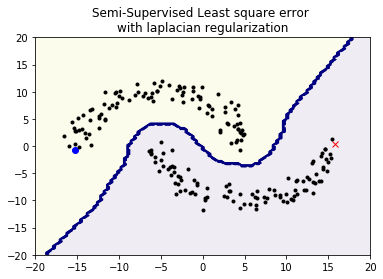

In [48]:
plt.plot(x[:,0][:,np.newaxis][y==1], 
         x[:,1][:,np.newaxis][y==1], 'bo')

plt.plot(x[:,0][:,np.newaxis][y==-1], 
         x[:,1][:,np.newaxis][y==-1], 'rx')

plt.plot(x[:,0][:,np.newaxis][y==0], 
         x[:,1][:,np.newaxis][y==0], 'k.')

X1,Y1 = np.meshgrid(X,X)
pop = np.sign(V.T @ (U * np.tile(t, (1,m))))
plt.contour(X1, Y1, pop, colors='navy')
plt.contourf(X1, Y1, pop, alpha=0.08)
plt.title('Semi-Supervised Least square error \nwith laplacian regularization')
plt.show()

##### Lesat Square Regression with Importance Weights

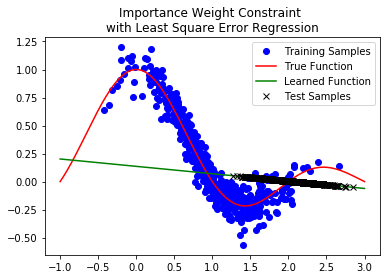

In [49]:
# Training input
n = 500
x = np.random.randn(n,1)/2+1

# Training output
y = np.sin(np.pi*x) / (np.pi*x) + 0.1 * np.random.randn(n,1)

# Test input
m = 1000
u = np.random.randn(m,1)/4+2 

# Test output
l = 10.0

x2 = x**2
xx = np.tile(x2,(1,n))+np.tile(x2.T,(n,1))-(2*(x @ x.T))

u2 = u**2
ux = np.tile(u2,(1,n))+np.tile(x2.T,(m,1))-2* u @ x.T

uu = np.tile(u2,(1,m))+np.tile(u2.T,(m,1))-(2*(u @ u.T))

k = np.exp(-xx/0.1)
r = np.exp(-ux/0.1)
q = np.exp(-uu/0.1)

w = r.T @ (np.linalg.inv(r @ r.T / n + 0.1*np.eye(m)) * \
           (np.mean(q).T))

xt = np.hstack((x, np.ones((n,1))))
t = (np.linalg.inv(xt.T * np.diag(w) @ xt) @ \
                 (xt.T * np.diag(w) @ y))

X = np.linspace(-1,3,m)
Y = np.sin(np.pi*X) / (np.pi*X)
v = u*t[0]+t[1]
Xv = X*t[0]+t[1]

plt.plot(x[:,0], y, 'bo', label = 'Training Samples')
plt.plot(X, Y, 'r-', label = 'True Function')
plt.plot(X, Xv, 'g-', label = 'Learned Function')
plt.plot(u, v, 'kx', label = 'Test Samples')
plt.title('Importance Weight Constraint \nwith Least Square Error Regression')
plt.legend(loc='best')
plt.show()

##### Least Square Error with Class Weight for Classification

In [146]:
# setting the training data and testing data
n = 100; N = 1000; rx = 0.90; l = 1000; rX = 0.10 
mine = 1.0e8; mine0 = 1.0e8

x1 = np.random.randn(np.int16(rx*n),1)-2
x2 = np.random.randn(np.int16(np.ceil((1.00-rx)*n)),1)+2
x3 = 2 * np.random.randn(n,1)
x4 = np.vstack((x1,x2))
x  = np.hstack((x4,x3))
print ('x.shape = {}'.format(x.shape))

y1 = np.ones((np.int16(rx*n), 1))
y2 = -np.ones((np.int16(np.ceil((1.00-rx)*n)),1))
y  = np.vstack((y1,y2))
print ('y.shape = {}'.format(y.shape))

X1 = np.random.randn(np.int16(rX*N),1)-2
X2 = np.random.randn(np.int16(np.ceil((1.00-rX)*N)),1)+2
X3 = 2 * np.random.randn(N,1)
X4 = np.vstack((X1,X2))
X  = np.hstack((X4,X3))
print ('X.shape = {}'.format(X.shape))

Y1 = np.ones((np.int16(rX*N), 1))
Y2 = -np.ones((np.int16(np.ceil((1.00-rX)*N)),1))
Y  = np.vstack((Y1,Y2))
print ('Y.shape = {}'.format(Y.shape))

# finding the optimal parameters

# defining the "eculidean distance"
def dis(x, y):
    dis = []
    for i in range(len(x)):
        for j in range(len(y)):
            asd = np.linalg.norm(x[i,:]-y)
            dis.append(round(asd,4))    
    return np.array(dis).reshape(len(x),len(y))

A = dis(x,x)
b = dis(x,X)

# A_+1,+1
a123 = []
A11 = A[:np.int16(rx*n), :np.int16(rx*n)]
for i in range(len(A11)):
    aee = A11[i].mean()
    a123.append(aee)
a11 = np.array(a123).reshape(1,len(A11)).mean()
print ("A_+1,+1: {}".format(round(a11,4)))

# A_+1,-1
a1234 = []
A12 = A[:np.int16(rx*n), np.int16(rx*n+1):]
for i in range(len(A12)):
    aee = A12[i].mean()
    a1234.append(aee)
a12 = np.array(a1234).reshape(1,len(A12)).mean()
print ("A_+1,-1: {}".format(round(a12,4)))

# A_-1,-1
a12345 = []
A22 = A[np.int16(rx*n+1):, np.int16(rx*n+1):]
for i in range(len(A22)):
    aee = A22[i].mean()
    a12345.append(aee)
a22 = np.array(a12345).reshape(1,len(A22)).mean()
print ("A_-1,-1: {}".format(round(a22,4)))

# b_1
b123 = []
B1 = b[:np.int16(rx*n),:]
for i in range(len(B1)):
    aee = B1[i].mean()
    b123.append(aee)
b1 = np.array(b123).reshape(1,len(B1)).mean()
print ("b_1: {}".format(round(b1,4)))

# b_-1
b1234 = []
B2 = b[np.int16(rx*n+1):,:]
for i in range(len(B2)):
    aee = B2[i].mean()
    b1234.append(aee)
b2 = np.array(b1234).reshape(1,len(B2)).mean()
print ("b_-1: {}".format(round(b2,4)))    

pT = (a12 - a22 - b1 + b2) / (2 * a12 - a11 - a22)
#pH = np.min(np.array([pT,1]))
pH = pT

wx = rx*(y==1) + (1-rx)*(y==-1)
wX = pH*(y==1) + (1-pH)*(y==-1)

w = np.diag(wX / wx)
x = np.hstack((x, np.ones((n,1))))

for inx in range(-2,7):
    l = 10**inx
    t = np.linalg.inv(x.T * w @ x + l*np.eye(3)) @ \
        (x.T * w @ y)    
    err = np.linalg.norm(x @ t - y)
    if err < mine:
        mine = err
        ot = t
        ol = l
        
for inx_1 in range(-2,7):  
    l = 10**inx_1
    t0 = np.linalg.inv(x.T @ x + l*np.eye(3)) @ (x.T @ y)     
    err0 = np.linalg.norm(x @ t0 - y)
    if err0 < mine0:
        mine0 = err0
        ot0 = t0
        ol0 = l 

x.shape = (100, 2)
y.shape = (100, 1)
X.shape = (1000, 2)
Y.shape = (1000, 1)
A_+1,+1: 35.0915
A_+1,-1: 35.0915
A_-1,-1: 47.9814
b_1: 153.0296
b_-1: 97.2689


In [147]:
X  = np.hstack((X, np.ones((N,1))))
e  = np.linalg.norm(Y - X @ ot)
e0 = np.linalg.norm(Y - X @ t0)

print (e)
print (e0)

26.0237422789
31.612715007


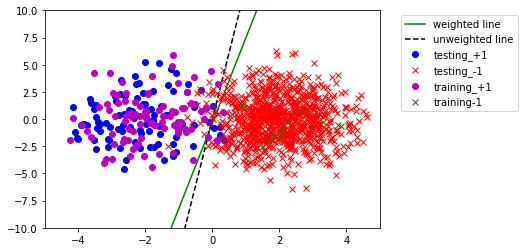

In [148]:
xx = range(-5,6)
plt.plot(xx,-(ot[2] + xx * ot[0] / ot[1]), 'g-', label='weighted line')
plt.plot(xx,-(t0[2] + xx * t0[0] / t0[1]), 'k--', label='unweighted line')

plt.plot(X[:,0][:,np.newaxis][Y==1], 
         X[:,1][:,np.newaxis][Y==1], 'bo', label='testing_+1')
plt.plot(X[:,0][:,np.newaxis][Y==-1], 
         X[:,1][:,np.newaxis][Y==-1], 'rx', label='testing_-1')

plt.plot(x[:,0][:,np.newaxis][y==1], 
         x[:,1][:,np.newaxis][y==1], 'mo', label='training_+1')
plt.plot(x[:,0][:,np.newaxis][y==-1], 
         x[:,1][:,np.newaxis][y==-1], 'gx', label='training-1')

plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.5)
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.show()


In [149]:
ot

array([[-0.28714238],
       [ 0.0366532 ],
       [ 0.37452316]])

In [145]:
t0

array([[ -1.96750041e-04],
       [  8.60543107e-06],
       [  7.99608254e-05]])